In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from functools import reduce

In [13]:
df = pd.read_csv("netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# Data Exploration

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


## Check Missing Values

In [15]:
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

Text(0.5, 1.0, 'Missing Values in Each Columns')

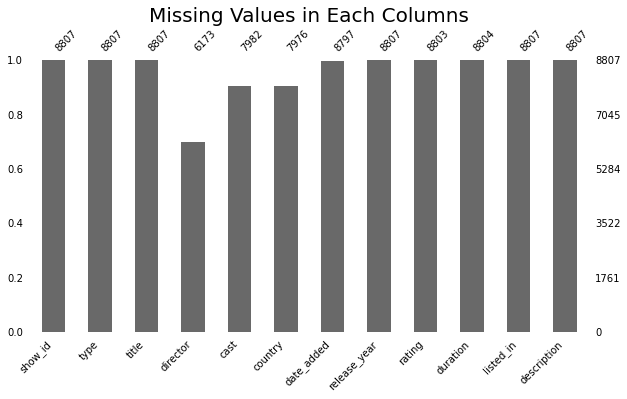

In [16]:
# Plot missing values in columns
import missingno
missingno.bar(df, fontsize=10, figsize=(10,5))
plt.title('Missing Values in Each Columns',fontsize=20)

1) There are missing values in column director, cast, country, date_added, rating and duration.
2) For columns director and cast, we can not fill the missing value. So, we can delete the missing value if necessary.
3) For column country, date_added, rating and duration, we can fill the data with the mode or the mean value.

## Handle Missing Values

In [17]:
df['country'] = df['country'].fillna(df['country'].mode()[0])
df['date_added'] = df['date_added'].fillna(df['date_added'].mode()[0])
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])
df['duration'] = df['duration'].fillna(df['duration'].mode()[0])

In [18]:
df = df.dropna(how="any", subset=['director', 'cast'])

In [19]:
df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [20]:
df.duplicated().sum()

0

## Data Cleaning

In [21]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [24]:
df['num_genres'] = df['listed_in'].apply(lambda x: len(x.split(',')))
df = df.rename(columns={'listed_in': 'Genre'})
df['Genre'] = df['Genre'].apply(lambda x: str(x).strip())
df['Genre'].unique()

array(['Crime TV Shows, International TV Shows, TV Action & Adventure',
       'TV Dramas, TV Horror, TV Mysteries', 'Children & Family Movies',
       'Dramas, Independent Movies, International Movies',
       'British TV Shows, Reality TV', 'Comedies, Dramas',
       'Dramas, International Movies',
       'Children & Family Movies, Comedies', 'Thrillers',
       'Comedies, International Movies',
       'Comedies, International Movies, Romantic Movies',
       'Comedies, International Movies, Music & Musicals', 'Comedies',
       'Horror Movies, Sci-Fi & Fantasy',
       'Dramas, International Movies, Thrillers',
       'Action & Adventure, Dramas, International Movies',
       'Action & Adventure, Dramas',
       'Action & Adventure, Classic Movies, Dramas',
       'Dramas, Horror Movies, Thrillers',
       'Action & Adventure, Horror Movies, Thrillers',
       'Action & Adventure',
       'International TV Shows, Romantic TV Shows, TV Comedies',
       'Dramas, Thrillers',
       'A

In [25]:
genre = df['Genre'].str.split(', ').dropna().to_numpy()
genre = list(np.unique(sum(genre, [])))
print(len(genre))
genre

42


['Action & Adventure',
 'Anime Features',
 'Anime Series',
 'British TV Shows',
 'Children & Family Movies',
 'Classic & Cult TV',
 'Classic Movies',
 'Comedies',
 'Crime TV Shows',
 'Cult Movies',
 'Documentaries',
 'Docuseries',
 'Dramas',
 'Faith & Spirituality',
 'Horror Movies',
 'Independent Movies',
 'International Movies',
 'International TV Shows',
 "Kids' TV",
 'Korean TV Shows',
 'LGBTQ Movies',
 'Movies',
 'Music & Musicals',
 'Reality TV',
 'Romantic Movies',
 'Romantic TV Shows',
 'Sci-Fi & Fantasy',
 'Science & Nature TV',
 'Spanish-Language TV Shows',
 'Sports Movies',
 'Stand-Up Comedy',
 'Stand-Up Comedy & Talk Shows',
 'TV Action & Adventure',
 'TV Comedies',
 'TV Dramas',
 'TV Horror',
 'TV Mysteries',
 'TV Sci-Fi & Fantasy',
 'TV Shows',
 'TV Thrillers',
 'Teen TV Shows',
 'Thrillers']

In [104]:
df['year_added'] = df['date_added'].apply(lambda x: int(x.split(', ')[1]))
df['month_added'] = df['date_added'].str.strip().apply(lambda x: x.split(' ')[0])
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,Genre,description,num_genres,year_added,month_added,country_main
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,3,2021,September,United States
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",United States,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,3,2021,September,United States
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",United States,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,1,2021,September,United States
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",3,2021,September,United States
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,2,2021,September,United Kingdom
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...,3,2016,March,United Arab Emirates
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",3,2019,November,United States
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,2,2019,November,United States
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2,2020,January,United States


In [27]:
df['country_main'] = df['country'].apply(lambda x: x.split(',')[0])
df.loc[365, 'country_main'] = 'France'
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,Genre,description,num_genres,year_added,month_added,country_main
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,3,2021,September,United States
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",United States,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,3,2021,September,United States
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",United States,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,1,2021,September,United States
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",3,2021,September,United States
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,2,2021,September,United Kingdom


In [28]:
df['type'].value_counts()

Movie      5522
TV Show     178
Name: type, dtype: int64

In [29]:
df['rating'].value_counts()

TV-MA       1940
TV-14       1329
R            789
PG-13        477
TV-PG        456
PG           279
TV-Y7        123
TV-Y         102
TV-G          96
NR            58
G             40
TV-Y7-FV       3
UR             3
NC-17          2
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64

#### Split the data set into two dataframes. One is Movie dataframe, and the other is TV Show dataframe.

In [105]:
movie_df = df[df['type'] == 'Movie']
tv_df = df[df['type'] == 'TV Show']
movie_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,Genre,description,num_genres,year_added,month_added,country_main
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",United States,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,1,2021,September,United States
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",3,2021,September,United States
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,2,2021,September,United States
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,2,2021,September,Germany
13,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,"Klara Castanho, Lucca Picon, Júlia Gomes, Marc...",United States,"September 22, 2021",2021,TV-PG,91 min,"Children & Family Movies, Comedies",When the clever but socially-awkward Tetê join...,2,2021,September,United States


## Exploratory Data Analysis

<BarContainer object of 2 artists>

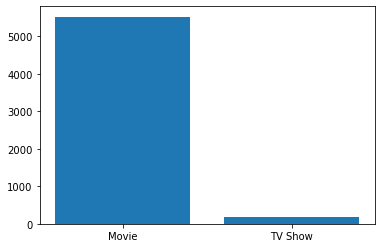

In [31]:
plt.bar(df['type'].value_counts().index, df['type'].value_counts())
# There are more Movies than TV Shows on Netflix

### Movie and TV Shows trend analysis

#### Production Trend

Text(0.5, 1.0, 'Movie and TV Show Production Trends')

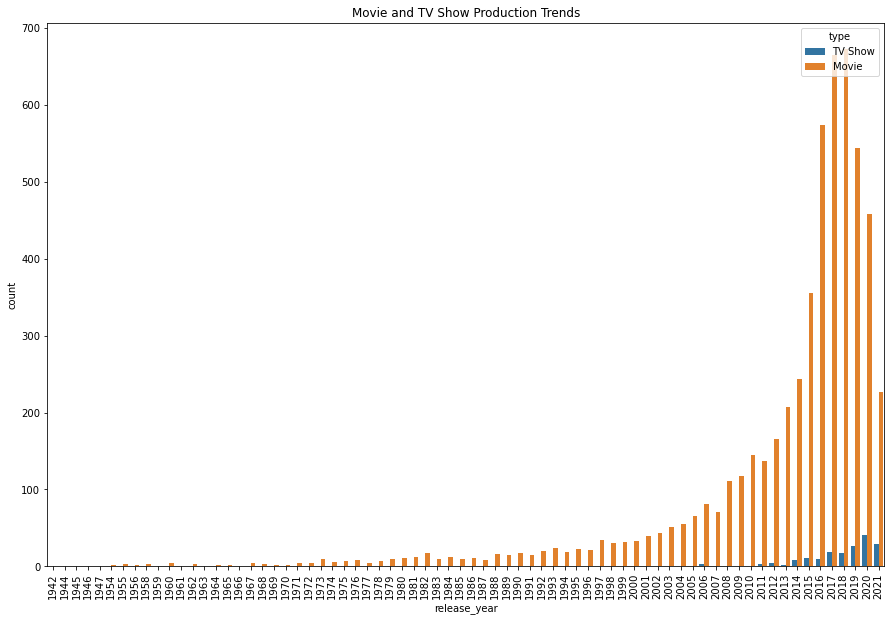

In [32]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.countplot(x='release_year', hue='type', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title("Movie and TV Show Production Trends")

#### Trends on Netflix

In [114]:
year_cnt = df.groupby(['year_added', 'type']).count()['show_id'].reset_index()
year_cnt = year_cnt.rename(columns={'show_id': 'count'})
year_cnt

,year_added,type,count
0,2008,Movie,1
1,2009,Movie,2
2,2010,Movie,1
3,2011,Movie,13
4,2012,Movie,3
5,2013,Movie,6
6,2013,TV Show,1
7,2014,Movie,14
8,2015,Movie,48
9,2015,TV Show,3


Text(0.5, 1.0, 'TV Show Trends on Netflix')

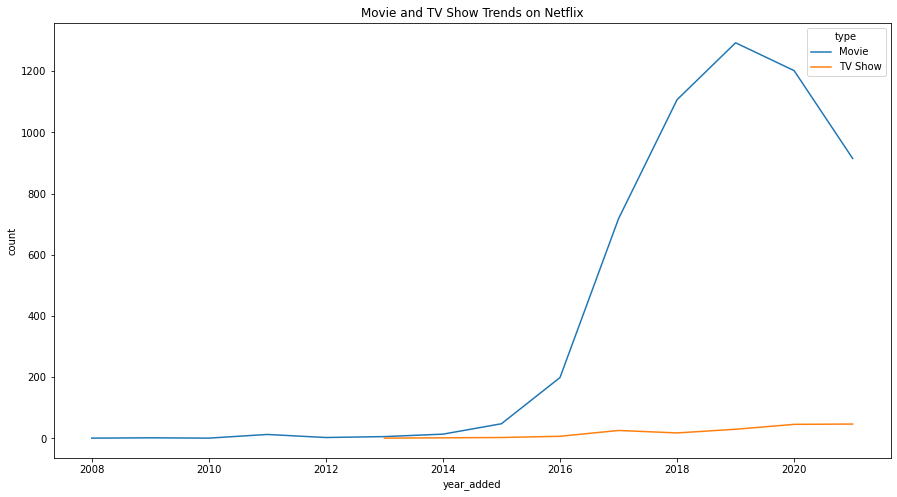

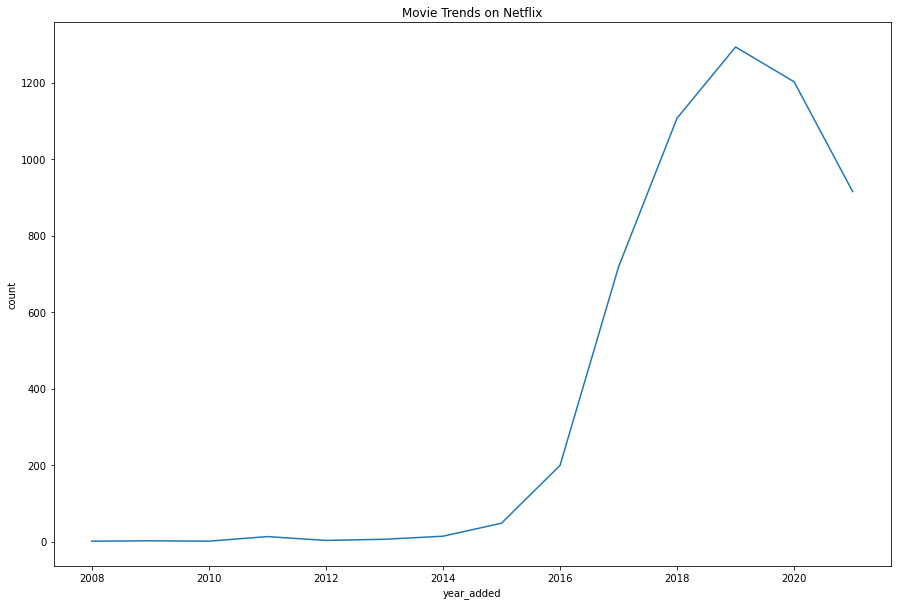

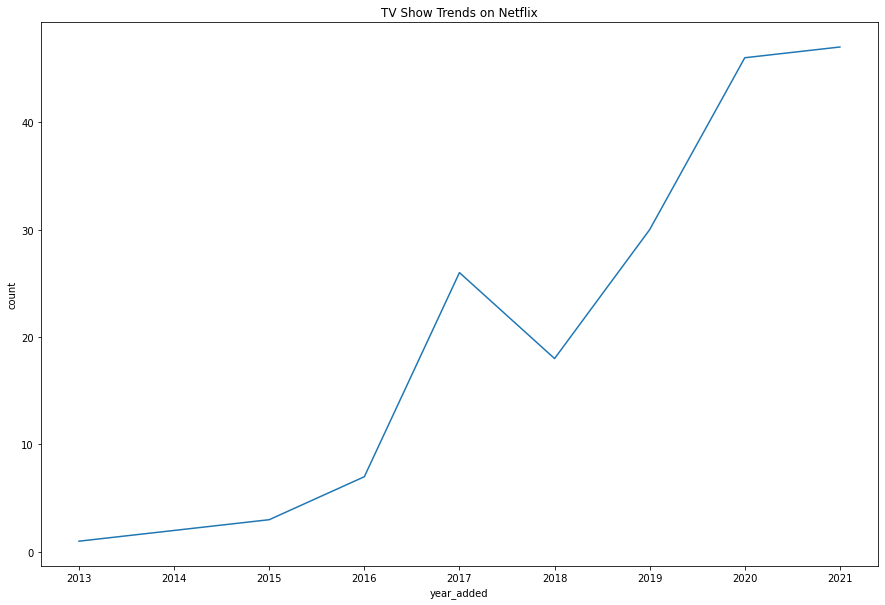

In [117]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.lineplot(x='year_added', y='count', hue='type', data=year_cnt)
plt.title("Movie and TV Show Trends on Netflix")

movie_cnt = year_cnt[year_cnt['type'] == 'Movie']
fig, ax = plt.subplots(figsize=(15, 10))
sns.lineplot(x='year_added', y='count', data=movie_cnt)
plt.title("Movie Trends on Netflix")

tv_cnt = year_cnt[year_cnt['type'] == 'TV Show']
fig, ax = plt.subplots(figsize=(15, 10))
sns.lineplot(x='year_added', y='count', data=tv_cnt)
plt.title("TV Show Trends on Netflix")

* Although the number of TV Shows is very small compared to movies, in recent years, we can see that there is an increasing trend in TV Shows, while there is a decreasing trend in Movies. It somehow reflects that Netflix has more focus on TV Shows in recent years.

#### Monthly Trends 

Text(0.5, 1.0, 'Monthly Movie Published Counts')

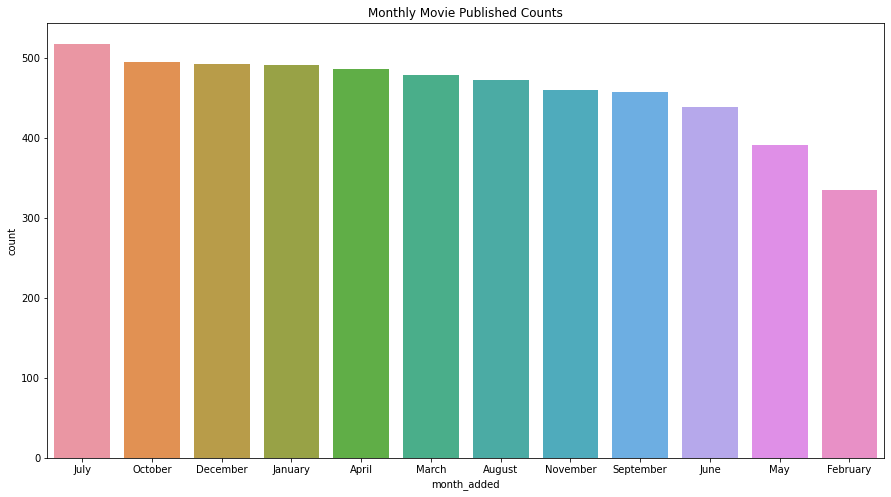

In [101]:
plt.figure(figsize=(15, 8))
sns.countplot(x='month_added', data=movie_df, order=movie_df['month_added'].value_counts().index[:15])
plt.title("Monthly Movie Published Counts")

Text(0.5, 1.0, 'Monthly TV Show Published Counts')

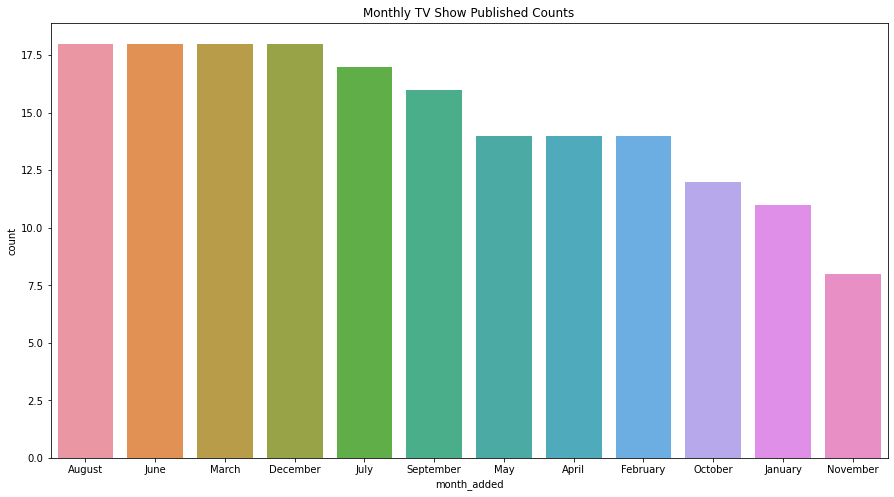

In [107]:
plt.figure(figsize=(15, 8))
sns.countplot(x='month_added', data=tv_df, order=tv_df['month_added'].value_counts().index[:15])
plt.title("Monthly TV Show Published Counts")

* July has the highest number of published movies, while Feburary has the lowest. The other months are quite same. Movie directors can consider to publish more movies in Feburary so that they may gain more viewers.
* Monthly TV Show Published Counts are lower in May, April, February, October, January and November.

### Movie and TV Shows Ratings Analysis

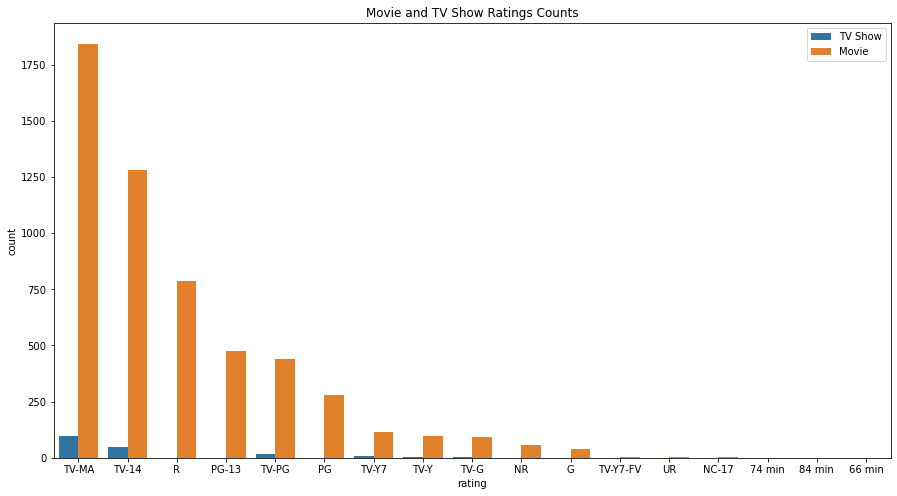

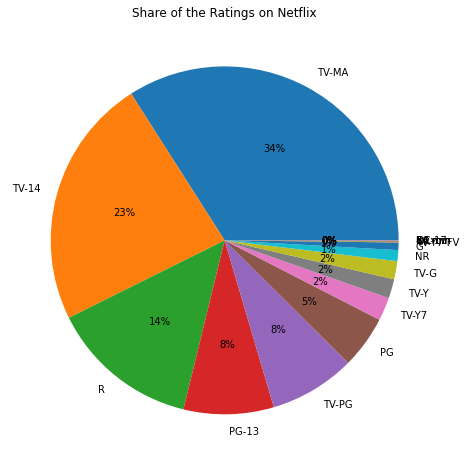

In [125]:
plt.figure(figsize=(15,8))
sns.countplot(x='rating', hue='type', data=df, order=movie_df['rating'].value_counts().index)
plt.legend(loc='upper right')
plt.title("Movie and TV Show Ratings Counts")
plt.show()

plt.figure(figsize=(8, 8))
rating_cnt = df['rating'].value_counts()
plt.pie(rating_cnt, labels=rating_cnt.index, autopct='%.0f%%')
plt.title("Share of the Ratings on Netflix")
plt.show()

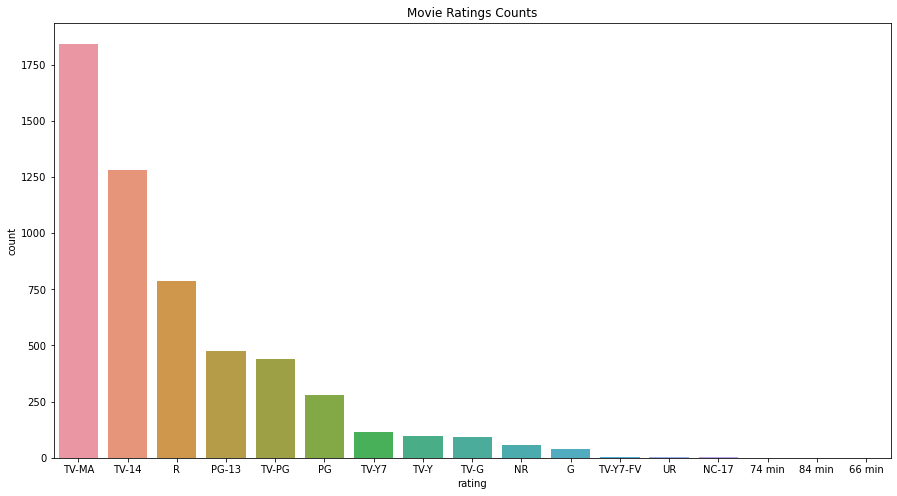

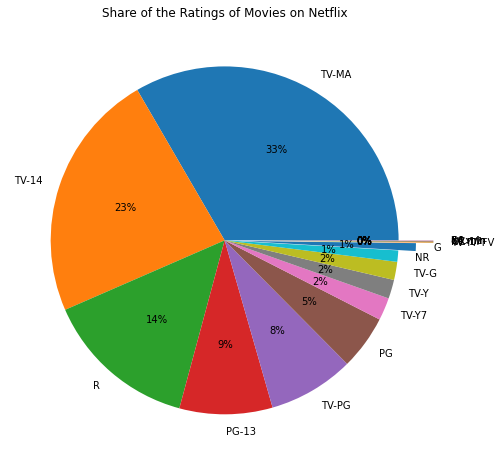

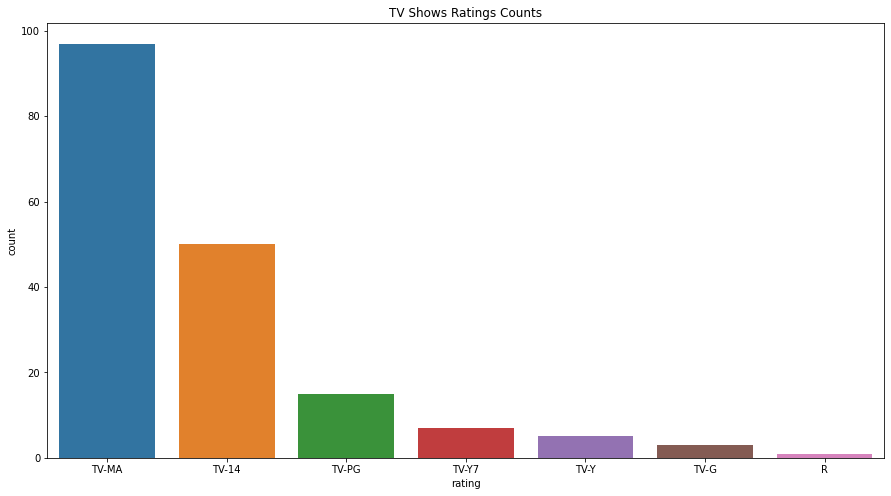

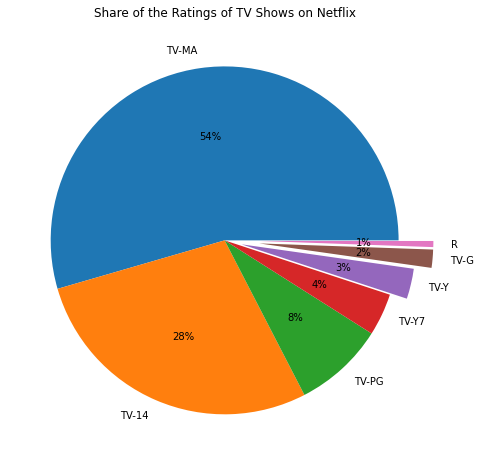

In [143]:
plt.figure(figsize=(15,8))
sns.countplot(x='rating', data=movie_df, order=movie_df['rating'].value_counts().index)
plt.title("Movie Ratings Counts")

plt.figure(figsize=(8, 8))
movie_rating_cnt = movie_df['rating'].value_counts()
plt.pie(movie_rating_cnt, labels=movie_rating_cnt.index, autopct='%.0f%%', explode=(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.1, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2))
plt.title("Share of the Ratings of Movies on Netflix")
plt.show()

plt.figure(figsize=(15,8))
sns.countplot(x='rating', data=tv_df, order=tv_df['rating'].value_counts().index)
plt.title("TV Shows Ratings Counts")

plt.figure(figsize=(8, 8))
tv_rating_cnt = tv_df['rating'].value_counts()
plt.pie(tv_rating_cnt, labels=tv_rating_cnt.index, autopct='%.0f%%', explode=(0, 0, 0, 0, 0.1, 0.2, 0.2))
plt.title("Share of the Ratings of TV Shows on Netflix")
plt.show()

### Movie and TV Shows Duration Analysis

In [35]:
movie_df = movie_df[movie_df['duration'] != '1 Season']
movie_df['duration'] = movie_df['duration'].apply(lambda x: int(x.split(' min')[0]))
movie_df['duration']

6        91
7       125
9       104
12      127
13       91
       ... 
8801     96
8802    158
8804     88
8805     88
8806    111
Name: duration, Length: 5519, dtype: int64

#### Overall Movie Duration Distribution

<AxesSubplot:xlabel='duration', ylabel='Density'>

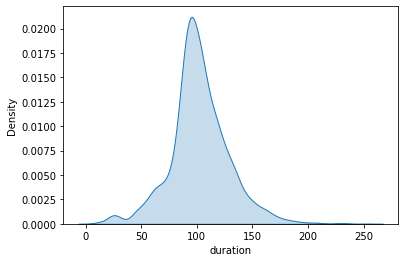

In [36]:
sns.kdeplot(data=movie_df['duration'], shade=True)

* Most movies on Netflix are among the duration of 75-130 mins.

#### Movie Duration Trend

In [37]:
annl_avg_durt = movie_df.groupby('release_year').mean()
annl_avg_durt

,duration,num_genres,year_added
release_year,,,
1942,18.000000,2.000000,2017.000000
1944,76.000000,2.000000,2017.000000
1945,63.000000,2.000000,2017.000000
1946,58.000000,2.000000,2017.000000
1947,42.000000,2.000000,2017.000000
...,...,...,...
2017,97.783133,2.109940,2018.200301
2018,98.237741,2.210996,2018.842496
2019,97.139706,2.170956,2019.516544


Text(0.5, 1.0, 'Movie Duration Trend')

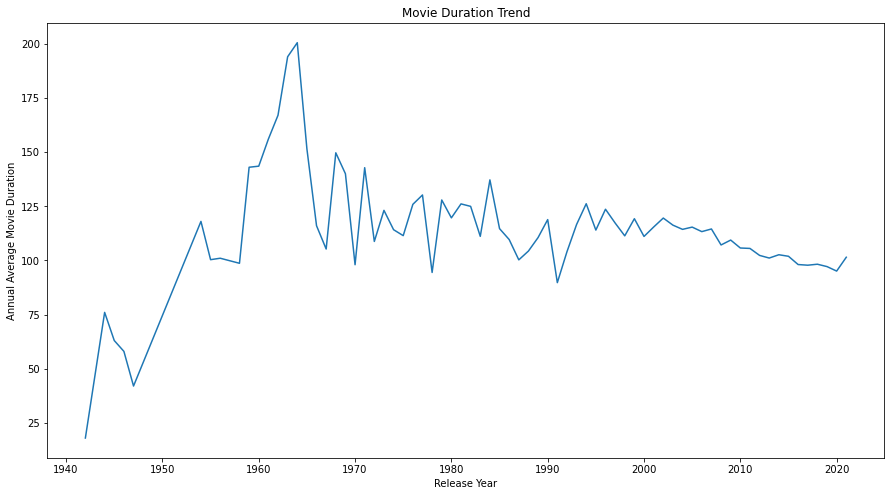

In [38]:
plt.figure(figsize=(15,8))
sns.lineplot(x=annl_avg_durt.index, y=annl_avg_durt.duration.values)
plt.ylabel("Annual Average Movie Duration")
plt.xlabel("Release Year")
plt.title("Movie Duration Trend")

* In the 1960s, Movie tended to have the longest duration (150-200 mins). 
* After that, the average duration shortened. It becomes quite stable since the 1980s (100-130 mins).

In [39]:
tv_df.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,Genre,description,num_genres,year_added,month_added,country_main
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,3,2021,September,United States
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",United States,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,3,2021,September,United States
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,2,2021,September,United Kingdom
11,s12,TV Show,Bangkok Breaking,Kongkiat Komesiri,"Sukollawat Kanarot, Sushar Manaying, Pavarit M...",United States,"September 23, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...","Struggling to earn a living in Bangkok, a man ...",3,2021,September,United States
47,s48,TV Show,The Smart Money Woman,Bunmi Ajakaiye,"Osas Ighodaro, Ini Dima-Okojie, Kemi Lala Akin...",United States,"September 16, 2021",2020,TV-MA,1 Season,"International TV Shows, Romantic TV Shows, TV ...",Five glamorous millennials strive for success ...,3,2021,September,United States
148,s149,TV Show,HQ Barbers,Gerhard Mostert,"Hakeem Kae-Kazim, Chioma Omeruah, Orukotan Ade...",United States,"September 1, 2021",2020,TV-14,1 Season,TV Shows,When a family run barber shop in the heart of ...,1,2021,September,United States
198,s199,TV Show,King of Boys: The Return of the King,Kemi Adetiba,"Sola Sobowale, Toni Tones, Richard Mofe-Damijo...",Nigeria,"August 27, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas",Alhaja Eniola Salami starts anew and sets her ...,3,2021,August,Nigeria
222,s223,TV Show,Clickbait,Brad Anderson,"Zoe Kazan, Betty Gabriel, Adrian Grenier, Phoe...",United States,"August 25, 2021",2021,TV-MA,1 Season,"Crime TV Shows, TV Dramas, TV Mysteries",When family man Nick Brewer is abducted in a c...,3,2021,August,United States
273,s274,TV Show,Gone for Good,Juan Carlos Medina,"Finnegan Oldfield, Nicolas Duvauchelle, Guilla...",France,"August 13, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas","Ten years after losing two loved ones, a man i...",3,2021,August,France
276,s277,TV Show,Valeria,Inma Torrente,"Diana Gómez, Silma López, Paula Malia, Teresa ...",Spain,"August 13, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, Spa...",A writer in creative and marital crises finds ...,3,2021,August,Spain


In [40]:
tv_df['duration'] = tv_df['duration'].apply(lambda x: int(x.split(' Season')[0]))
tv_df['duration']

/var/folders/yg/d_3p7x1n73zdg44xll039yg40000gn/T/ipykernel_46355/3924656689.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_df['duration'] = tv_df['duration'].apply(lambda x: int(x.split(' Season')[0]))


2       1
5       1
8       9
11      1
47      1
       ..
8172    1
8214    1
8293    1
8302    1
8599    3
Name: duration, Length: 178, dtype: int64

#### TV Shows with the Most Number of Seasons on Netflix

In [41]:
tv_df[['title', 'duration']].sort_values('duration', ascending=False)[:9]

,title,duration
2423,Supernatural,15
3541,Naruto,9
8,The Great British Baking Show,9
1998,Call the Midwife,9
2947,Arrow,8
7896,Royal Pains,8
380,The Flash,7
3653,Comedians in Cars Getting Coffee,6
1173,Men on a Mission,6


In [42]:
seasons_cnt = tv_df['duration'].value_counts()
othersum = seasons_cnt[2:].sum()
othersum = pd.DataFrame([['>= 3', othersum]])
othersum.columns = ['index', 'duration']
cnt = pd.DataFrame(seasons_cnt[:2]).reset_index()
seasons_cnt = cnt.append(othersum)
seasons_cnt

,index,duration
0,1,137
1,2,18
0,>= 3,23


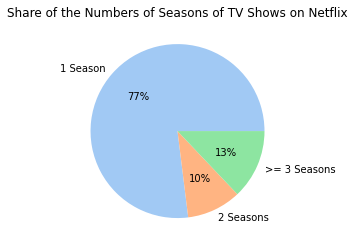

In [43]:
labels = ['1 Season', '2 Seasons', '>= 3 Seasons']
colors = sns.color_palette('pastel')[0:3]
plt.pie(seasons_cnt.duration, labels=labels, colors=colors, autopct='%.0f%%')
plt.title("Share of the Numbers of Seasons of TV Shows on Netflix")
plt.show()

### Country Productivity

#### Country Movie Productivity

Text(0.5, 1.0, 'Top Country Movie Productivity')

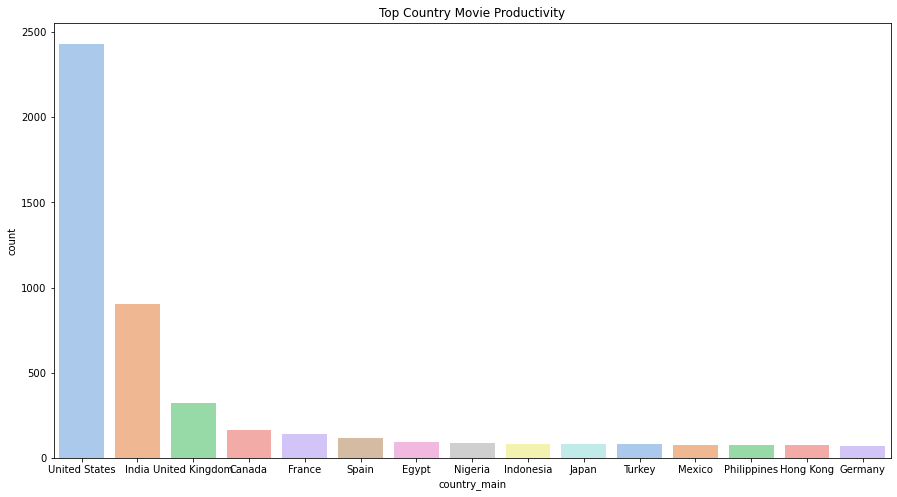

In [44]:
plt.figure(figsize=(15, 8))
sns.countplot(x='country_main', data=movie_df, palette='pastel', order=movie_df['country_main'].value_counts().index[0:15])
plt.title("Top Country Movie Productivity")

#### Country TV Shows Productivity

Text(0.5, 1.0, 'Top Country TV Shows Productivity')

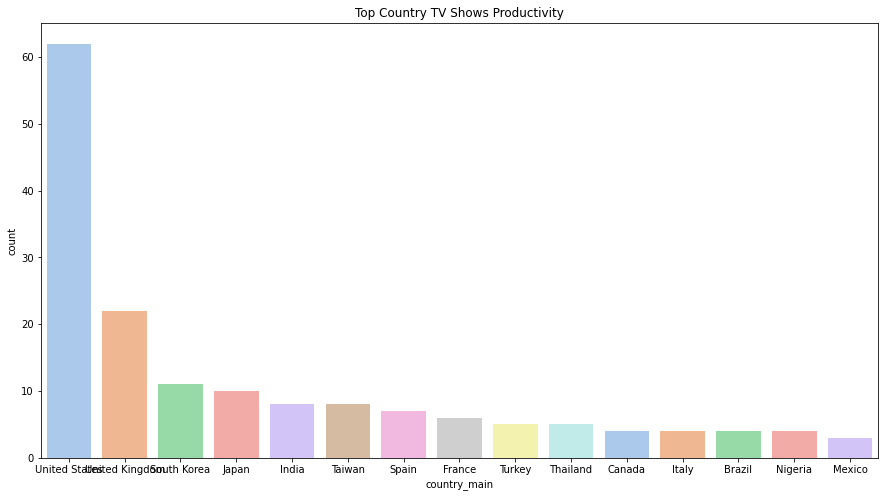

In [45]:
plt.figure(figsize=(15, 8))
sns.countplot(x='country_main', data=tv_df, palette='pastel', order=tv_df['country_main'].value_counts().index[0:15])
plt.title("Top Country TV Shows Productivity")

### Genres Analysis

#### Popular Genres

In [71]:
all_genre = df['Genre'].str.split(', ').dropna().to_numpy()
all_genre = pd.DataFrame(sum(all_genre, []))
all_genre.columns = ['Genre']

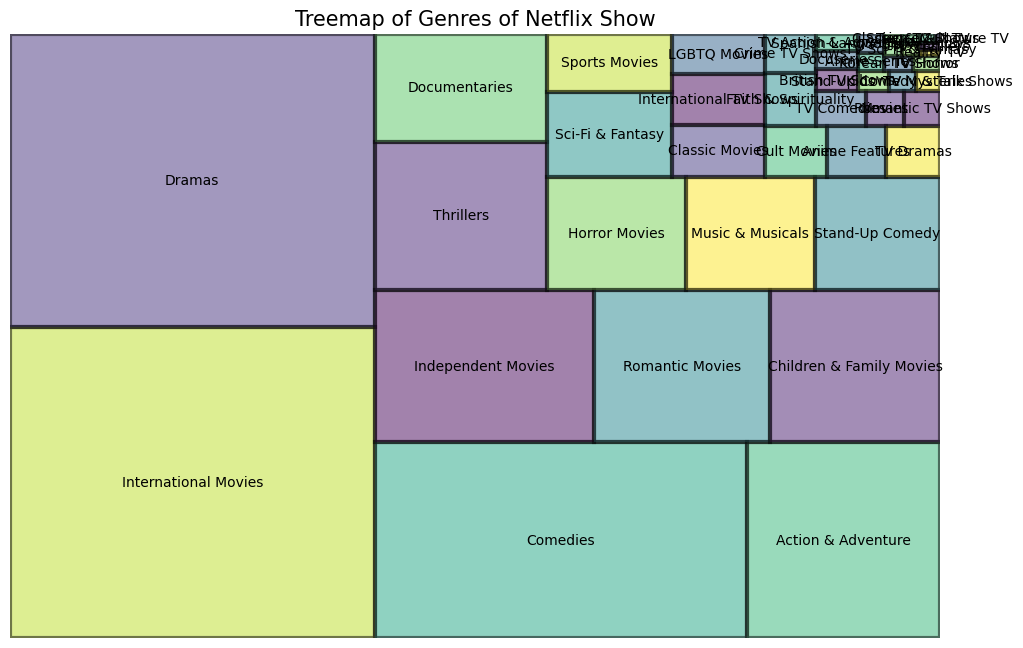

In [134]:
temp = all_genre.value_counts().reset_index()
temp.columns=['Genre', 'count']
sizes=np.array(temp['count'])
labels=temp['Genre']

import squarify
plt.figure(figsize=(12,8), dpi= 100)
squarify.plot(sizes=sizes, label=labels, alpha=.5, edgecolor="black", linewidth=3, text_kwargs={'fontsize':10})
plt.title('Treemap of Genres of Netflix Show', fontsize = 15)
plt.axis('off')
plt.show()

#### Available Genres in Different Countries

In [46]:
cntry_genre = df[['country_main', 'Genre']]
cntry_genre['genre'] = cntry_genre['Genre'].apply(lambda x: x.split(', '))
cntry_genre = cntry_genre.groupby(['country_main'])['genre'].apply(lambda x: list(x)).reset_index()
cntry_genre

/var/folders/yg/d_3p7x1n73zdg44xll039yg40000gn/T/ipykernel_46355/3113424766.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cntry_genre['genre'] = cntry_genre['Genre'].apply(lambda x: x.split(', '))


,country_main,genre
0,Argentina,"[[Dramas, International Movies, Thrillers], [C..."
1,Australia,"[[Action & Adventure, Comedies], [Children & F..."
2,Austria,"[[Horror Movies, International Movies, Thrille..."
3,Bangladesh,"[[Dramas, Independent Movies, International Mo..."
4,Belgium,"[[Dramas, International Movies, Thrillers], [C..."
...,...,...
71,United States,"[[Crime TV Shows, International TV Shows, TV A..."
72,Uruguay,"[[Documentaries, International Movies, Music &..."
73,Venezuela,"[[Documentaries, International Movies]]"
74,Vietnam,"[[Dramas, International Movies, Romantic Movie..."


In [47]:
cntry_genre['genre'] = cntry_genre['genre'].apply(lambda a: reduce(lambda x, y: x.extend(y) or x, a))
cntry_genre

,country_main,genre
0,Argentina,"[Dramas, International Movies, Thrillers, Come..."
1,Australia,"[Action & Adventure, Comedies, Children & Fami..."
2,Austria,"[Horror Movies, International Movies, Thriller..."
3,Bangladesh,"[Dramas, Independent Movies, International Mov..."
4,Belgium,"[Dramas, International Movies, Thrillers, Chil..."
...,...,...
71,United States,"[Crime TV Shows, International TV Shows, TV Ac..."
72,Uruguay,"[Documentaries, International Movies, Music & ..."
73,Venezuela,"[Documentaries, International Movies]"
74,Vietnam,"[Dramas, International Movies, Romantic Movies..."


In [48]:
cntry_genre['genre'] = cntry_genre['genre'].apply(lambda x: list(set(x)))
cntry_genre

,country_main,genre
0,Argentina,"[LGBTQ Movies, TV Comedies, Sci-Fi & Fantasy, ..."
1,Australia,"[LGBTQ Movies, Sci-Fi & Fantasy, Classic Movie..."
2,Austria,"[International Movies, Sci-Fi & Fantasy, Horro..."
3,Bangladesh,"[Dramas, International Movies, Independent Mov..."
4,Belgium,"[International Movies, TV Dramas, Children & F..."
...,...,...
71,United States,"[Classic & Cult TV, Kids' TV, LGBTQ Movies, TV..."
72,Uruguay,"[International Movies, Music & Musicals, Comed..."
73,Venezuela,"[International Movies, Documentaries]"
74,Vietnam,"[International Movies, Romantic Movies, Action..."


In [54]:
cntry_genre['unavailable_genre'] = cntry_genre['genre'].apply(lambda x: [a for a in genre if a not in x])
cntry_genre.head(5)

,country_main,genre,unavailable_genre
0,Argentina,"[LGBTQ Movies, TV Comedies, Sci-Fi & Fantasy, ...","[Anime Features, Anime Series, British TV Show..."
1,Australia,"[LGBTQ Movies, Sci-Fi & Fantasy, Classic Movie...","[Anime Features, Anime Series, British TV Show..."
2,Austria,"[International Movies, Sci-Fi & Fantasy, Horro...","[Action & Adventure, Anime Features, Anime Ser..."
3,Bangladesh,"[Dramas, International Movies, Independent Mov...","[Action & Adventure, Anime Features, Anime Ser..."
4,Belgium,"[International Movies, TV Dramas, Children & F...","[Action & Adventure, Anime Features, Anime Ser..."


### Productive Actors and Productive Directors

#### Productive Actors (Only counting the leading roles)

In [91]:
lead_cast = df['cast'].apply(lambda x: x.split(', ')[:2]).dropna().to_numpy()
lead_cast = pd.DataFrame(sum(lead_cast, []))
lead_cast.columns = ['cast']
lead_cast

,cast
0,Sami Bouajila
1,Tracy Gotoas
2,Kate Siegel
3,Zach Gilford
4,Vanessa Hudgens
...,...
10776,Woody Harrelson
10777,Tim Allen
10778,Courteney Cox
10779,Vicky Kaushal


Text(0, 0.5, 'Number of Productions on Netflix')

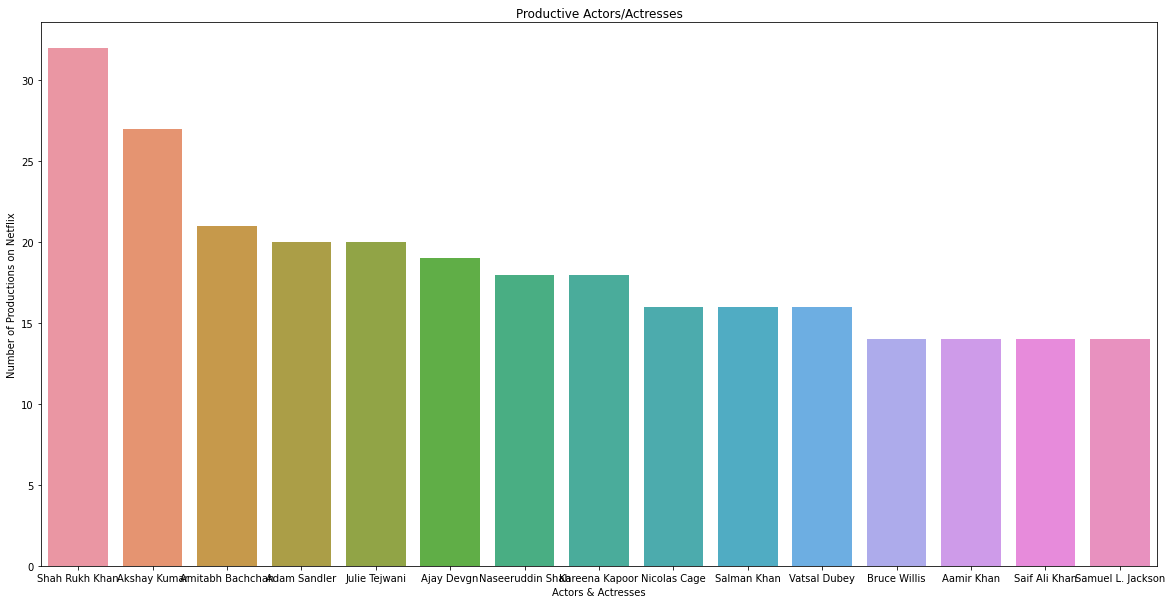

In [99]:
plt.figure(figsize=(20, 10))
sns.countplot(x='cast', data=lead_cast, order=lead_cast['cast'].value_counts().index[:15])
plt.title("Productive Actors/Actresses")
plt.xlabel("Actors & Actresses")
plt.ylabel("Number of Productions on Netflix")

#### Productive Directors

Text(0, 0.5, 'Number of Movies on Netflix')

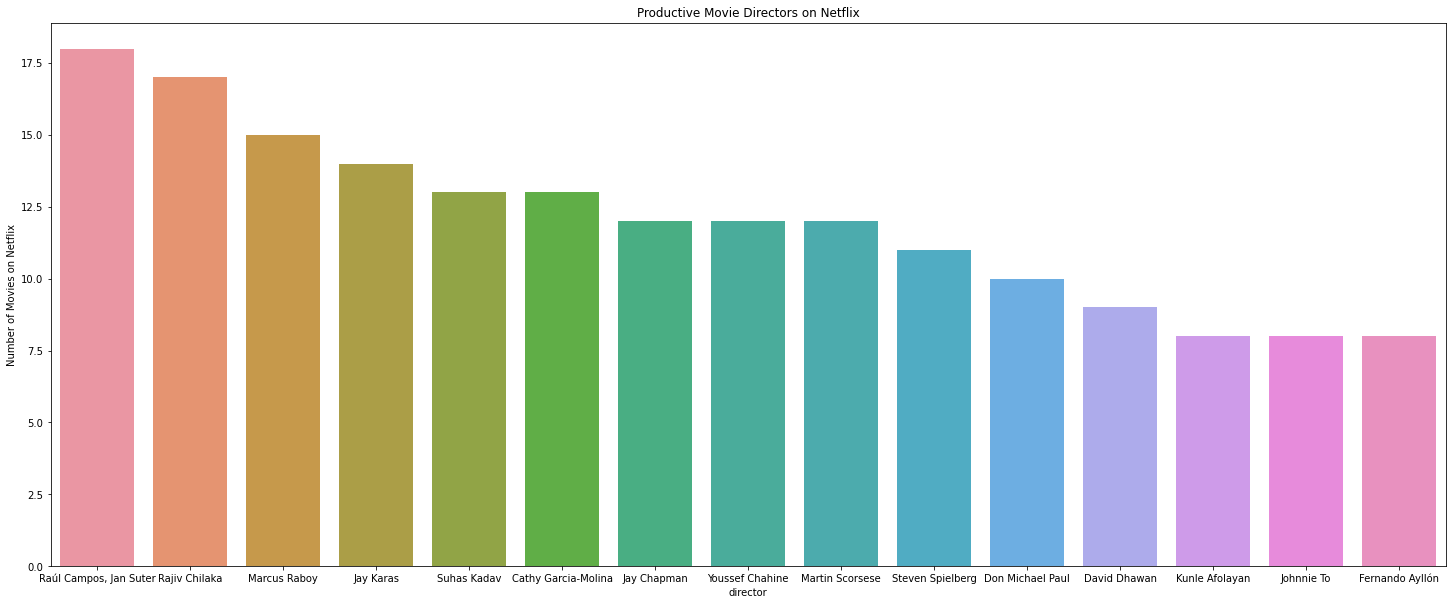

In [97]:
plt.figure(figsize=(25, 10))
sns.countplot(x='director', data=movie_df, order=movie_df['director'].value_counts().index[:15])
plt.title("Productive Movie Directors on Netflix")
plt.ylabel("Number of Movies on Netflix")

Text(0, 0.5, 'Number of TV Shows on Netflix')

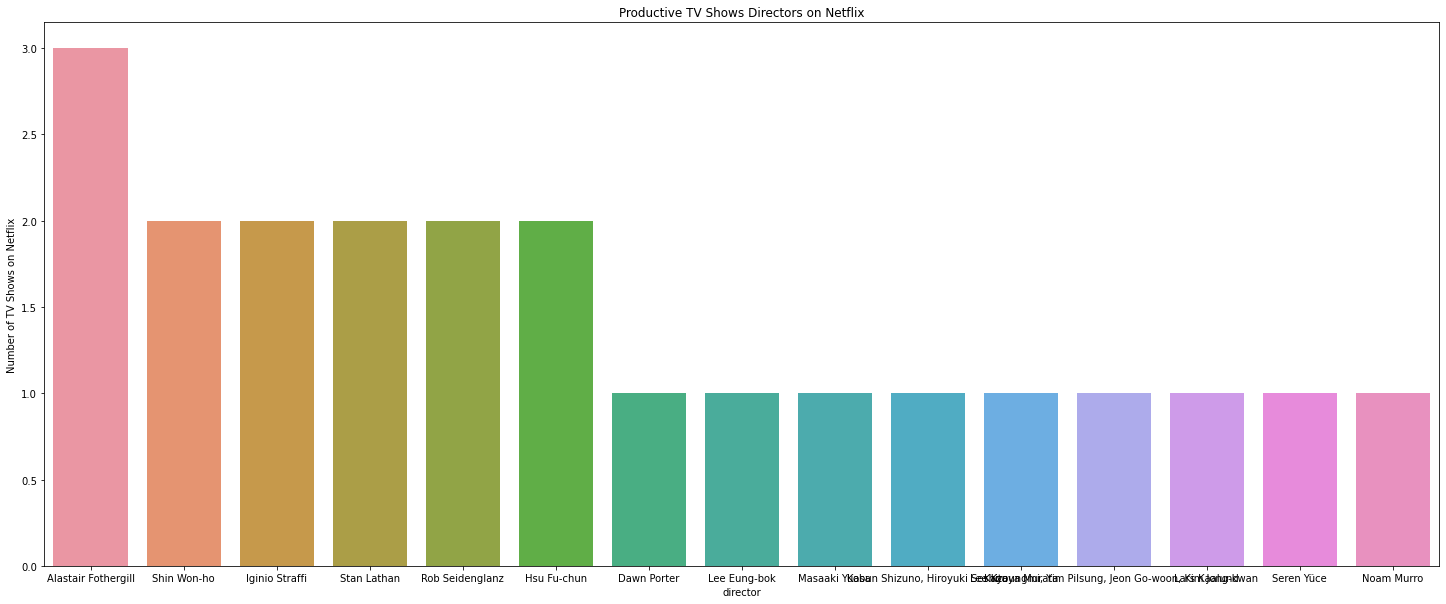

In [98]:
plt.figure(figsize=(25, 10))
sns.countplot(x='director', data=tv_df, order=tv_df['director'].value_counts().index[:15])
plt.title("Productive TV Shows Directors on Netflix")
plt.ylabel("Number of TV Shows on Netflix")

### Content Analysis

#### Word Clouds for title

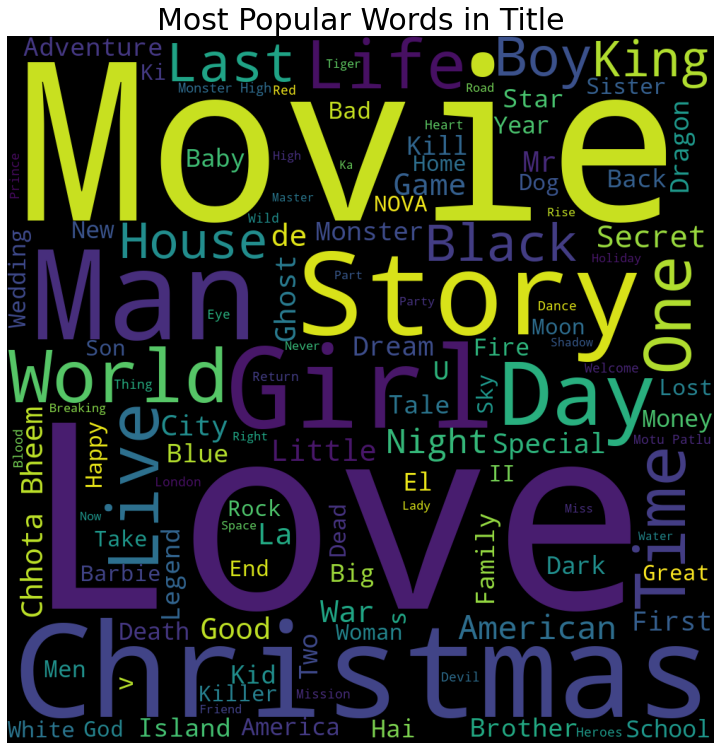

In [120]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
plt.rcParams['figure.figsize'] = (13, 13)
wordcloud = WordCloud(stopwords=STOPWORDS,background_color = 'black', width = 1000,  height = 1000, max_words = 121).generate(' '.join(df['title']))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Popular Words in Title',fontsize = 30)
plt.show()

#### Word Cloud for Description

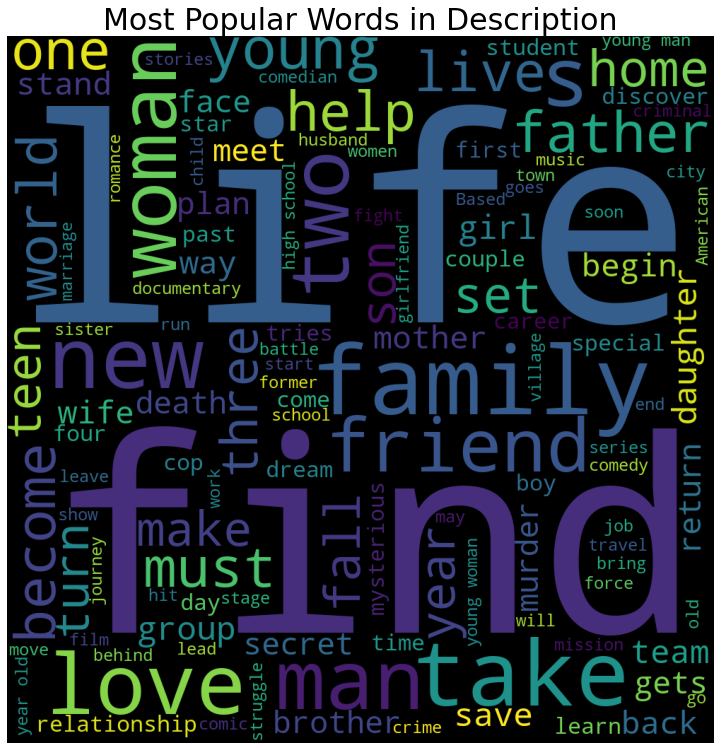

In [122]:
plt.rcParams['figure.figsize'] = (13, 13)
wordcloud = WordCloud(stopwords=STOPWORDS,background_color = 'black', width = 1000,  height = 1000, max_words = 121).generate(' '.join(df['description']))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Popular Words in Description',fontsize = 30)
plt.show()